In [34]:
!apt-get remove --purge '^cuda.*'
!apt-get remove --purge '^libnvidia.*'
!apt-get remove --purge '^libcudnn.*'
!apt-get autoremove
!apt-get autoclean


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-libraries-dev-9-2' for regex '^cuda.*'
Note, selecting 'cuda-nvprof-9-2' for regex '^cuda.*'
Note, selecting 'cuda-toolkit-12-4-config-common' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-11-0' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-11-1' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-11-7' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-11-8' for regex '^cuda.*'
Note, selecting 'cuda-toolkit-12-5-config-common' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-0' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-1' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-2' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-3' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-4' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-5' for regex '^cuda.*'
Note, selecting 'cuda-cudart-dev-12-6' for regex '^cuda.*'

In [42]:
!wget https://developer.download.nvidia.com/compute/cuda/12.4.0/local_installers/cuda_12.4.0_550.54.14_linux.run
!sudo sh cuda_12.4.0_550.54.14_linux.run --silent --toolkit

--2025-02-12 16:46:13--  https://developer.download.nvidia.com/compute/cuda/12.4.0/local_installers/cuda_12.4.0_550.54.14_linux.run
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 184.28.146.153
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|184.28.146.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4454353277 (4.1G) [application/octet-stream]
Saving to: ‘cuda_12.4.0_550.54.14_linux.run’

cuda_12.4.0_550.54. 100%[===================>]   4.15G  96.3MB/s    in 53s     

2025-02-12 16:47:06 (80.1 MB/s) - ‘cuda_12.4.0_550.54.14_linux.run’ saved [4454353277/4454353277]



In [43]:
import os
os.environ['CUDA_HOME'] = "/usr/local/cuda-12.4"
os.environ['LD_LIBRARY_PATH'] = "/usr/local/cuda-12.4/lib64:" + os.environ.get('LD_LIBRARY_PATH', '')
os.environ['PATH'] = "/usr/local/cuda-12.4/bin:" + os.environ.get('PATH', '')


In [44]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Tue_Feb_27_16:19:38_PST_2024
Cuda compilation tools, release 12.4, V12.4.99
Build cuda_12.4.r12.4/compiler.33961263_0


In [45]:
!nvidia-smi

Wed Feb 12 16:51:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [52]:
!nvcc -O3 mandelbrot.cu -o mandelbrot

In [53]:
!nvprof ./mandelbrot out.csv

==41840== NVPROF is profiling process 41840, command: ./mandelbrot out.csv
==41840== Profiling application: ./mandelbrot out.csv
==41840== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   98.98%  2.58815s         1  2.58815s  2.58815s  2.58815s  mandelbrot(int*)
                    1.02%  26.763ms         2  13.382ms  5.3844ms  21.379ms  [CUDA memcpy DtoH]
      API calls:   89.13%  2.59777s         1  2.59777s  2.59777s  2.59777s  cudaDeviceSynchronize
                    9.84%  286.93ms         2  143.46ms  123.11us  286.81ms  cudaMalloc
                    0.99%  28.831ms         2  14.415ms  5.7620ms  23.069ms  cudaMemcpy
                    0.02%  622.65us         1  622.65us  622.65us  622.65us  cudaLaunchKernel
                    0.01%  291.56us         1  291.56us  291.56us  291.56us  cudaFree
                    0.01%  231.74us       114  2.0320us     162ns  89.510us  cuDeviceGetAttribute
                  

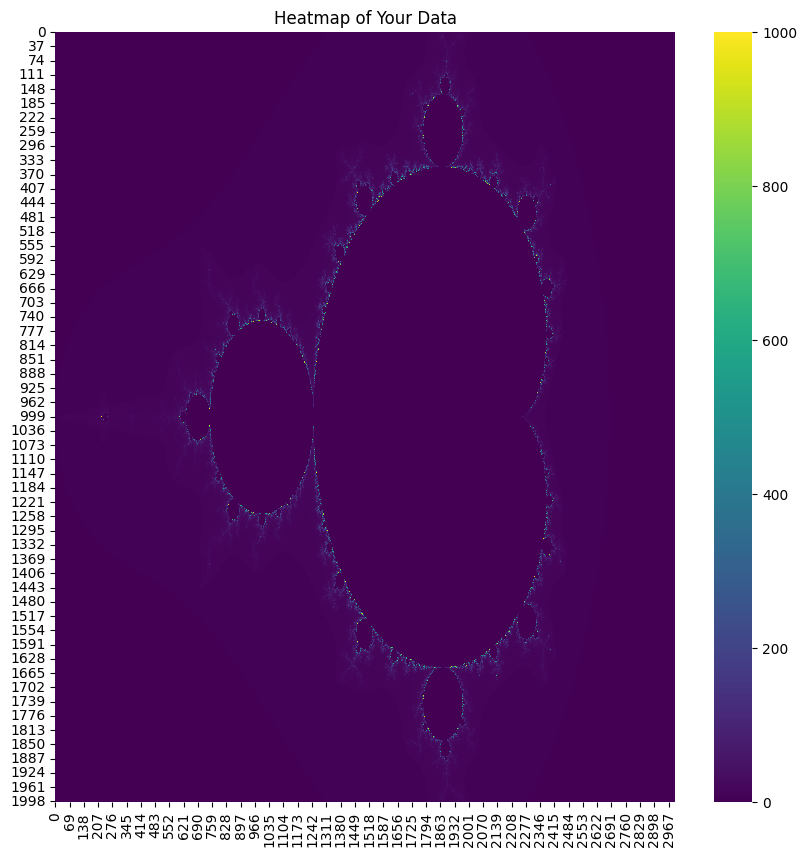

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data into a Pandas DataFrame
data = pd.read_csv('out.csv', header=None)  # Assuming no header row

# Create the heatmap using seaborn
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.heatmap(data, cmap='viridis')  # Choose a suitable colormap
plt.title('Heatmap of Your Data')
plt.show()